In [1]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
data = pd.read_csv("/kaggle/input/agriculture-yield/agricultural_yield.csv")
data.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [4]:
x = data[['Soil_Quality','Seed_Variety','Fertilizer_Amount_kg_per_hectare','Sunny_Days','Rainfall_mm']]
y=data['Yield_kg_per_hectare'].values

In [5]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
model = Sequential([Dense(64,activation='relu',input_shape=(x_train.shape[1],)),Dense(32,activation='relu'),Dense(1)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [9]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 537567.7500 - mae: 703.0650 - val_loss: 561739.3750 - val_mae: 722.9961
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 519553.5625 - mae: 691.4948 - val_loss: 523469.8125 - val_mae: 697.0751
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 474083.7500 - mae: 660.6339 - val_loss: 418146.1875 - val_mae: 621.3157
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 357493.9688 - mae: 571.5834 - val_loss: 254444.7031 - val_mae: 479.8610
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 199865.7969 - mae: 420.2961 - val_loss: 107704.3906 - val_mae: 295.4405
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79156.1719 - mae: 246.5380 - val_loss: 42984.6172 - val_mae: 167.2910
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33427.8125 - mae: 147.3824 - val_loss: 29338.7871 - val_mae: 135.0563
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25329.7637 - mae: 126.1822 - val_los

In [10]:
test_loss, test_mae = model.evaluate(x_test,y_test,verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16387.3047 - mae: 102.3085
Test Mean Absolute Error: 99.91


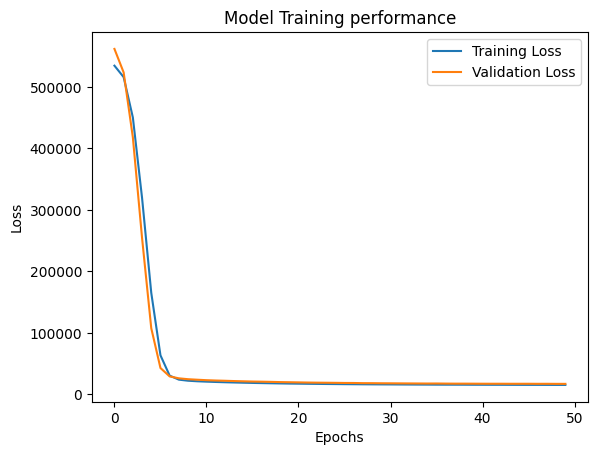

In [11]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training performance')
plt.legend()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


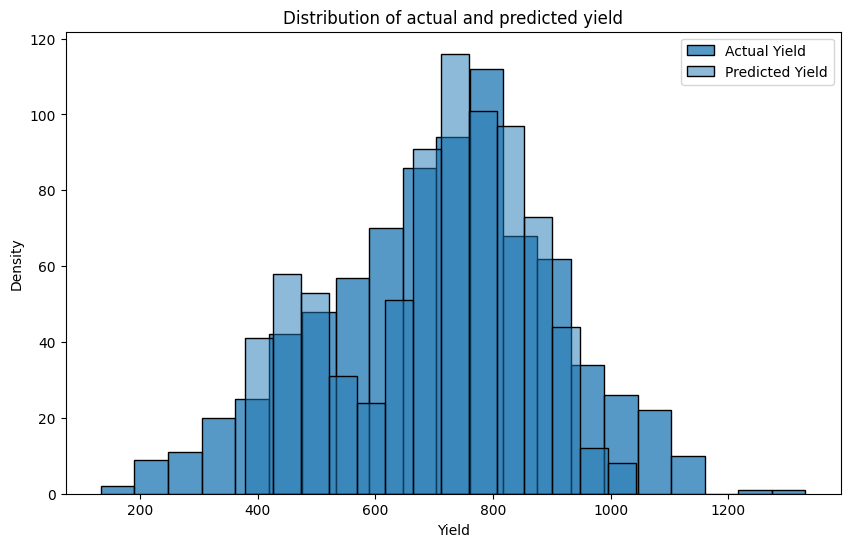

In [12]:
#distribution plots
y_pred = model.predict(x_test)
plt.figure(figsize=(10, 6))
sns.histplot(y_test, label='Actual Yield')
sns.histplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of actual and predicted yield")
plt.legend()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<ipython-input-35-f920ce905716>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-35-f920ce905716>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histogr

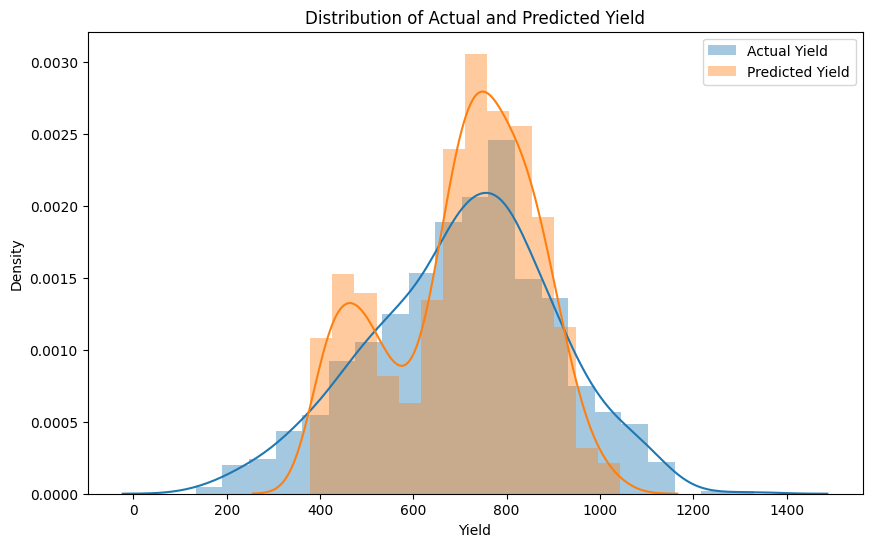

In [35]:
# Distribution plots
y_pred = model.predict(x_test)
plt.figure(figsize=(10, 6))
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

In [13]:
predictions = model.predict(x_test)
predictions

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[ 484.43036],
       [ 796.0337 ],
       [ 862.7149 ],
       [ 766.2402 ],
       [ 831.7555 ],
       [ 884.0805 ],
       [ 410.7105 ],
       [ 574.52527],
       [ 520.92194],
       [ 724.41675],
       [ 729.4488 ],
       [ 705.2281 ],
       [ 716.3977 ],
       [ 824.6232 ],
       [ 835.81177],
       [ 717.1847 ],
       [ 869.81256],
       [ 471.47122],
       [ 468.0547 ],
       [ 387.5141 ],
       [ 708.85474],
       [ 904.577  ],
       [ 418.61395],
       [ 884.4171 ],
       [ 847.28485],
       [ 543.96643],
       [ 685.3372 ],
       [ 817.43964],
       [ 497.28775],
       [ 719.4031 ],
       [ 707.7707 ],
       [ 732.14514],
       [ 711.5973 ],
       [ 673.3781 ],
       [ 551.5694 ],
       [ 757.2122 ],
       [ 737.41345],
       [ 999.35785],
       [ 463.0235 ],
       [ 728.35736],
       [ 833.7132 ],
       [ 840.0052 ],
       [ 753.4576 ],
       [ 446.45047],
       [ 670.73254],
       [ 888.2892 ],
       [ 400.33295],
       [ 706.

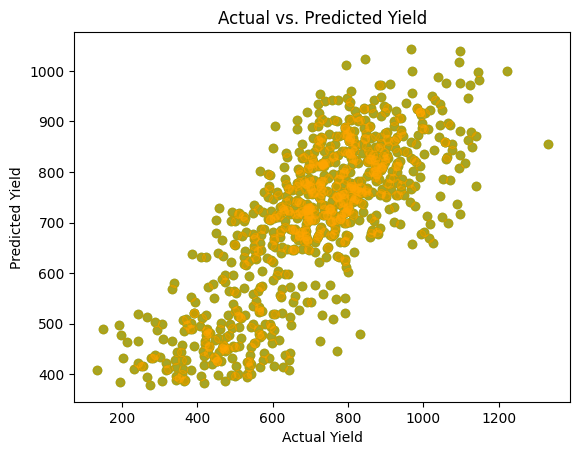

In [26]:
plt.scatter(y_test, predictions, c='green', label='y_test', alpha=0.7)
plt.scatter(y_test, predictions, c='orange', label='predictions', alpha=0.5)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs. Predicted Yield')
plt.show()

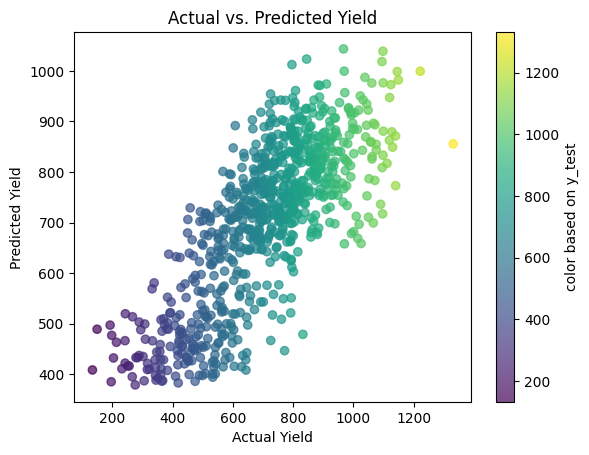

In [25]:
plt.scatter(y_test, predictions, c=y_test, cmap='viridis', alpha=0.7) 
plt.colorbar(label='color based on y_test')

plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs. Predicted Yield')
plt.show()